## 1. Load Data

In [1]:
using TorusEvol
using Distributions

chainX = from_pdb("1A3N", "A")
chainY = from_pdb("1MBN", "A")
X = data(chainX)
Y = data(chainY)
Yt = slice(Y, 2:num_sites(Y)-1, [1])
@info Yt

#hack, 
data(X)[2][isnan.(data(X)[2])] .= 0.0
data(Y)[2][isnan.(data(Y)[2])] .= 0.0

my_diff = jumping(WrappedDiffusion(0.5, -1.0, 2.0, 2.0, 1.0, 1.0, 0.1), 1.0)
my_diff2 = jumping(WrappedDiffusion(3.5, 2.0, 2.0, 2.0, 1.0, 1.0, 0.1), 10.0)

w = WAG_SubstitutionProcess
processes = [w w; my_diff my_diff2]
weights = [0.8, 0.2]
ξ = MixtureProductProcess(weights, processes)
emission_lps = Matrix{Float64}(undef, num_sites(X)+1, num_sites(Y)+1)
@time fulllogpdf!(emission_lps, ξ, 0.01, X, Y)
t = 0.001
λ = 1.05; μ = 120.07; r = 0.2
align_model = TKF92([t], λ, μ, r)
pair_hmm = PairDataHMM(align_model, num_sites(X), num_sites(Y))
    
@time logpdf(pair_hmm, emission_lps)
render_aligned(chainX, chainY)

[ Info: Precompiling TorusEvol [4b860a26-b3bc-4b38-a9ed-83c1dc5d19b0]
[ Info: File exists: 1A3N
[ Info: File exists: 1MBN
┌ Info: ObservedData(
│ num sites: 151
│ num coords: 1
└ )


  8.862089 seconds (33.21 M allocations: 1.798 GiB, 6.78% gc time, 76.49% compilation time)
  1.436997 seconds (5.45 M allocations: 269.987 MiB, 9.50% gc time, 62.51% compilation time)


[ Info: Superimposing based on a sequence alignment between 141 residues
[ Info: Superimposing based on 141 atoms
[ Info: Model 1 with 2 chains (1,2), 294 residues, 2495 atoms


HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

## 2. Inference Model

In [2]:
using Turing 
using ReverseDiff
#Turing.setadbackend(:reversediff)
Turing.setrdcache(true)
Turing.setadbackend(:forwarddiff)
Turing.setprogress!(true)

@model function pair_param_inference(X, Y; E=2)
    # Sample branch length a.k.a. time
    t ~ Exponential(1.0)
    
    
    # Sample alignment parameters 
    # todo - do this in a stand-alone submodel
    λ_a ~ Exponential(10.0)
    seq_length ~ Exponential(0.01)
    μ_a = (seq_length+1) * λ_a
    r_a ~ Uniform(0,1)
    align_model = TKF92([t], λ_a, μ_a, r_a)
    
    
    # Sample site-level evolutionary processes 
    
    # Sample the weight of each regime
    proc_weights ~ Dirichlet(E, 1.0)
    
    # Sample aminoacid substitution parameters
    # todo - construct custom substitution process
    sub_procs = reshape(fill(WAG_SubstitutionProcess, E), 1, E)
    
    # Sample dihedral angle evolution parameters
    #todo - do this in a stand-alone submodel
    μ_𝜙 = Vector(undef, E); μ_𝜓 = Vector(undef, E)
    for e ∈ 1:E 
        μ_𝜙[e] ~ Uniform(-π, π)
        μ_𝜓[e] ~ Uniform(-π, π)
    end
    σ_𝜙 = fill(2.0, E); σ_𝜓 = fill(2.0, E)
    α_𝜙 = fill(1.0, E); α_𝜙 = fill(1.0, E); α_cov = fill(0.1, E)
    γ = fill(20.0, E)
    #diff_procs = reshape(jumping.(WrappedDiffusion.(μ_𝜙, μ_𝜓, σ_𝜙, σ_𝜓, α_𝜙, α_𝜙, α_cov), γ), 1, E)
    diff_procs = reshape(WrappedDiffusion.(μ_𝜙, μ_𝜓, σ_𝜙, σ_𝜓, α_𝜙, α_𝜙, α_cov), 1, E)
            
    # Construct mixture product process
    ξ = MixtureProductProcess(proc_weights, vcat(sub_procs, diff_procs))
    

    # Observe X, Y by proxy of their joint probabilities 
    emission_lps = fulllogpdf(ξ, t, X, Y)
    pair_hmm = PairDataHMM(align_model, num_sites(X), num_sites(Y))
    Turing.@addlogprob! logpdf(pair_hmm, emission_lps)
end

[ Info: [Turing]: progress logging is enabled globally
[ Info: [AdvancedVI]: global PROGRESS is set as true


pair_param_inference (generic function with 2 methods)

Sampling: 100%|█████████████████████████████████████████| Time: 0:11:28
[ Info: MCMC chain (10×11×1 Array{Float64, 3})


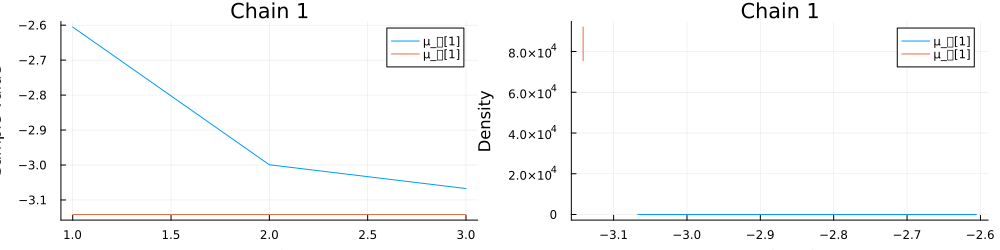

GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120595
GKS: glyph missing from current font: 120601
GKS: glyph missing from current font: 120601
GKS: glyph

In [6]:
using TorusEvol
using StatsPlots

model = pair_param_inference(X, Y)
alg = Gibbs(HMC(0.03, 5, :t), HMC(0.03, 5, :λ_a), HMC(0.03, 5, :μ_𝜙), HMC(0.1, 5, :μ_𝜓))
algmh = Gibbs(MH(:μ_𝜙), MH(:μ_𝜓))
numsamples = 100

@info chains = sample(model, alg, numsamples)

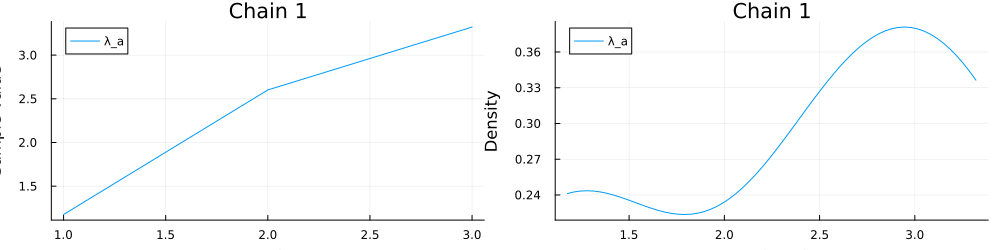

In [10]:
plot(chains[["λ_a"]]; colordim=:parameter, legend=true)

[ Info: File exists: 1A3N
[ Info: File exists: 1A3N
[ Info: Superimposing based on a sequence alignment between 138 residues
[ Info: Superimposing based on 138 atoms
[ Info: Model 1 with 2 chains (1,2), 286 residues, 2507 atoms


HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

## 2. Prepare Evolutionary Regimes

In [2]:
include("src/distributions/WrappedNormal.jl")
include("src/distributions/Processes.jl")
include("src/distributions/WrappedDiffusion.jl")
include("src/distributions/Common.jl")
include("src/distributions/JumpingProcess.jl")
using Base.Threads


nthreads()

10

In [4]:
using Turing
using StatsPlots
using DistributionsAD
using ReverseDiff
using LinearAlgebra
Turing.setadbackend(:reversediff)
Turing.setrdcache(true)
Turing.setprogress!(true)
@model function difftest(x, y)
    μ ~ WrappedNormal([0.0, 0.0], [3.0 0.0; 0.0 3.0])
    μ = cmod(μ)
    diff = WrappedDiffusion(μ, 2.0, 3.0, 1.0, 1.0, 0.1)
    γ ~ Exponential(40.0)
    jdiff = jumping(diff, γ)
    t = 0.1
    origin = [-2.0, -3.0]
    p_ij = Matrix{Real}(undef, size(x, 2), size(y, 2))
    jointlogpdf!(p_ij, jdiff, t, x, y)
    Turing.@addlogprob! tr(p_ij)
end

[ Info: [Turing]: progress logging is enabled globally
[ Info: [AdvancedVI]: global PROGRESS is set as true


difftest (generic function with 2 methods)

In [ ]:
function fun()
    μ = [-3.0, 1.0]
    Σ = [1.0 0.0; 0.0 1.0]
    t = 0.1
    γ = 20.0
    
    diff = jumping(WrappedDiffusion(μ, 2.0, 3.0, 1.0, 1.0, 0.1), γ)
    origin = [-2.0, -3.0]
    
    
    x = rand(statdist(diff), 100)
    tt = Array{ContinuousMultivariateDistribution}(undef, size(x, 2)); transdist!(tt, diff, t, x)
    y = similar(x); eachcol(y) .= rand.(tt)
    numsamples = 20
    hmc = HMC(0.03, 5)
    g = Gibbs(HMC(0.03, 5, :μ), HMC(0.1, 5, :γ))
    mh = MH()
    chains = sample(difftest(x, y), g, numsamples)
    plot(chains[["μ[1]", "μ[2]"]]; colordim=:parameter, legend=true)
end
@time fun()